### PCA and t-SNE are two dimension reductionality techniques published about 15 years apart. PCA is a linear technique and usually does a poor job handling non linear distribution of data. t-SNE however does handle non-linear data better but is computationally more expensive the PCA, scaling quadratically with number of data points.
#### One difference between PCA and t-SNE is that t-SNE tries to maximize local distance distribution between points when reducing total number of dimensions, however PCA tries to maximize variance of projected data by choosing directions capturing maximum distance first.
#### When dimensions get very large, and we want to use t-SNE, we usually first use PCA, etc computationally cheaper technique to reduce to say 50 dimensions, and then use t-SNE to reduce it down further

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
(X_raw,Y), (_,_) = tf.keras.datasets.mnist.load_data('mnist_data')

One sample image : 
AxesImage(54,36;334.8x217.44)


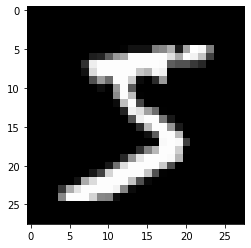

In [2]:
print('One sample image : ')
print(plt.imshow(X_raw[0][:,:], cmap='gray'))

In [3]:
shape = X_raw.shape
X = X_raw.reshape(shape[0], shape[1]*shape[2])
random_perm = np.random.permutation(shape[0])

In [4]:
def plot( dataset, x_name, y_name ):
    plt.figure(figsize=(12,8))
    sns.scatterplot(
        x= x_name, y= y_name, hue="y",
        palette=sns.color_palette(),
        data= dataset, legend="full", alpha=0.3 )

In [5]:
column_names = ['pxl'+ str(i) for i in range(X.shape[1])]
data = pd.DataFrame( X, columns = column_names )
data['y'] = Y
data['label'] = data['y'].apply(lambda i: str(i))

Explained variation per principal component: [0.09704664 0.07095924 0.06169089]


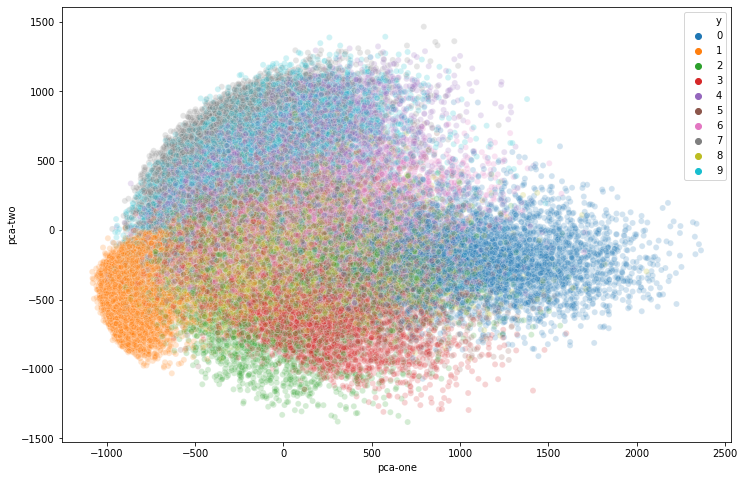

In [6]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(data[column_names].values)
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
data['pca-one'] = pca_result[:,0]
data['pca-two'] = pca_result[:,1]
plot( data.loc[random_perm,:], "pca-one", "pca-two")

### Time to try out t-SNE, but we should reduce number of data points we consider, to avoid large computational resources it will take.

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.473s...
[t-SNE] Computed neighbors for 10000 samples in 125.801s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 442.909133
[t-SNE] KL divergence after 250 iterations with early exaggeration: 86.069664
[t-SNE] KL divergence after 300 iterations: 2.848978


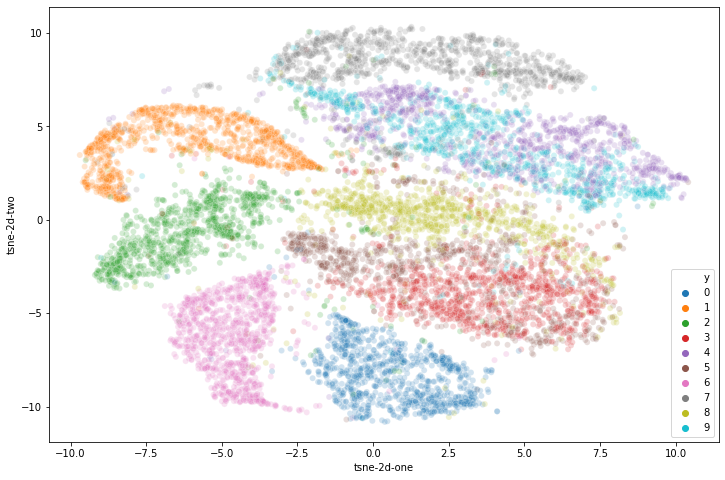

In [22]:
#Let's take a subset because t-SNE is computationally expensive!
N = 10000
data_subset = data.loc[random_perm[:N],:].copy()
data_values = data_subset[ column_names ].values #deep copy
tsne = TSNE( n_components=2, verbose=1, perplexity=40, n_iter=300 )
tsne_results = tsne.fit_transform( data_values )
data_subset['tsne-2d-one'] = tsne_results[:,0]
data_subset['tsne-2d-two'] = tsne_results[:,1]
plot( data_subset, 'tsne-2d-one', 'tsne-2d-two' )

### Let's try using t-SNE followed by PCA, where the latter reduces ~780 dimensions to just 30 dimensions

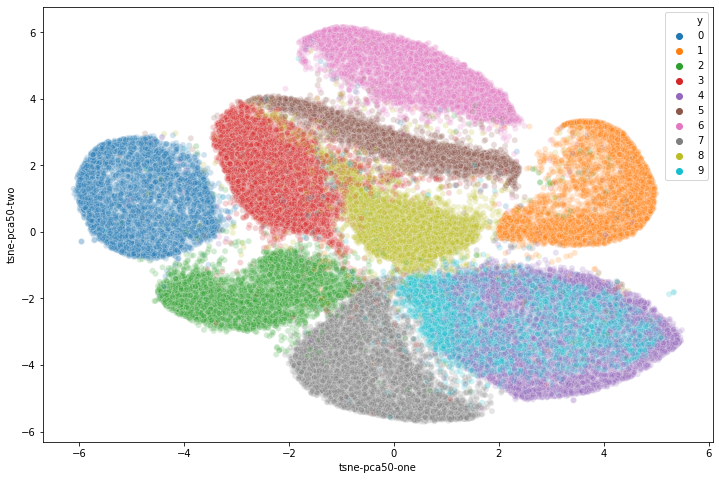

In [23]:
pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(data)
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
tsne_pca_results = tsne.fit_transform(pca_result_50)
data['tsne-pca50-one'] = tsne_pca_results[:,0]
data['tsne-pca50-two'] = tsne_pca_results[:,1]
plot( data, 'tsne-pca50-one', 'tsne-pca50-two' )